In [18]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from math import e
from joblib import dump, load
import xskillscore as xs
import cartopy.crs as ccrs
import iris
import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.cm as mpl_cm
import numpy as np

from minisom import MiniSom

In [19]:
fogData = xr.open_dataset('../../../Data/FogData/CombinedFogData_25Stations.nc')
#plt.figure(figsize=[16,8])
StackFog=fogData.fogdata.stack(a=('years','months','days'))
StackFog
dd =[];
for i in range(StackFog.years.values.shape[0]):
    dd=dd+[str(StackFog.years[i].values)+'-'+str(StackFog.months[i].values)+"-"+str(StackFog.days[i].values)]
fg = xr.Dataset({'fogdata': (('time','stations'), StackFog.values.T)}, coords={'time': pd.to_datetime(dd),'stations': fogData.stations})
yAll=fg.fogdata.sum(dim='stations').sel(time=slice('1980-12-1','2018-1-31'))
yAll=yAll/25.0
yWd= yAll[yAll >0.44]
yWd

<xarray.DataArray 'fogdata' (time: 588)>
array([0.48, 0.52, 0.6 , 0.64, 0.6 , 0.6 , 0.48, 0.48, 0.48, 0.52, 0.48,
       0.48, 0.48, 0.6 , 0.48, 0.56, 0.48, 0.52, 0.48, 0.52, 0.48, 0.52,
       0.52, 0.56, 0.56, 0.64, 0.48, 0.48, 0.48, 0.6 , 0.52, 0.6 , 0.56,
       0.48, 0.6 , 0.6 , 0.56, 0.52, 0.48, 0.52, 0.48, 0.52, 0.48, 0.48,
       0.48, 0.52, 0.48, 0.52, 0.48, 0.48, 0.52, 0.56, 0.48, 0.6 , 0.6 ,
       0.6 , 0.48, 0.56, 0.48, 0.52, 0.56, 0.48, 0.56, 0.48, 0.48, 0.6 ,
       0.6 , 0.56, 0.6 , 0.48, 0.56, 0.56, 0.52, 0.48, 0.56, 0.52, 0.48,
       0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.52, 0.52, 0.48, 0.48,
       0.48, 0.6 , 0.72, 0.48, 0.68, 0.48, 0.56, 0.56, 0.52, 0.64, 0.68,
       0.52, 0.72, 0.64, 0.48, 0.72, 0.48, 0.48, 0.48, 0.48, 0.56, 0.48,
       0.48, 0.56, 0.56, 0.6 , 0.52, 0.48, 0.48, 0.48, 0.6 , 0.64, 0.56,
       0.6 , 0.64, 0.64, 0.52, 0.6 , 0.6 , 0.68, 0.52, 0.6 , 0.68, 0.56,
       0.52, 0.72, 0.6 , 0.64, 0.56, 0.52, 0.52, 0.48, 0.6 , 0.6 , 0.56,
       0.52, 0.52, 0.6 , 0.76, 0.84, 0.8 , 0.64, 0.8 , 0.64, 0.72, 0.76,
       0.76, 0.52, 0.52, 0.48, 0.48, 0.6 , 0.48, 0.48, 0.56, 0.52, 0.64,
       0.56, 0.56, 0.72, 0.88, 0.76, 0.52, 0.72, 0.72, 0.64, 0.52, 0.52,
       0.56, 0.56, 0.76, 0.68, 0.52, 0.56, 0.72, 0.72, 0.72, 0.68, 0.72,
       0.56, 0.52, 0.48, 0.52, 0.52, 0.56, 0.6 , 0.68, 0.68, 0.64, 0.68,
       0.92, 0.84, 0.64, 0.56, 0.52, 0.52, 0.48, 0.56, 0.52, 0.68, 0.64,
       0.52, 0.48, 0.64, 0.48, 0.84, 0.84, 0.6 , 0.52, 0.48, 0.64, 0.72,
...
       0.72, 0.56, 0.72, 0.68, 0.76, 0.6 , 0.68, 0.72, 0.72, 0.68, 0.72,
       0.76, 0.84, 0.84, 0.8 , 0.8 , 0.84, 0.68, 0.48, 0.52, 0.64, 0.68,
       0.64, 0.48, 0.48, 0.48, 0.48, 0.48, 0.6 , 0.72, 0.72, 0.68, 0.48,
       0.64, 0.76, 0.8 , 0.68, 0.6 , 0.56, 0.52, 0.56, 0.6 , 0.68, 0.52,
       0.56, 0.64, 0.64, 0.48, 0.48, 0.56, 0.68, 0.52, 0.6 , 0.48, 0.48,
       0.52, 0.48, 0.68, 0.64, 0.64, 0.56, 0.56, 0.56, 0.48, 0.64, 0.6 ,
       0.52, 0.56, 0.52, 0.52, 0.6 , 0.52, 0.48, 0.76, 0.6 , 0.68, 0.64,
       0.48, 0.48, 0.64, 0.48, 0.6 , 0.72, 0.68, 0.56, 0.48, 0.56, 0.56,
       0.52, 0.56, 0.56, 0.64, 0.72, 0.6 , 0.8 , 0.8 , 0.76, 0.72, 0.6 ,
       0.68, 0.8 , 0.76, 0.72, 0.76, 0.48, 0.64, 0.68, 0.56, 0.48, 0.56,
       0.52, 0.56, 0.52, 0.52, 0.64, 0.72, 0.48, 0.6 , 0.52, 0.52, 0.52,
       0.6 , 0.64, 0.6 , 0.48, 0.48, 0.56, 0.56, 0.48, 0.48, 0.52, 0.52,
       0.48, 0.56, 0.76, 0.6 , 0.48, 0.52, 0.48, 0.48, 0.6 , 0.6 , 0.72,
       0.48, 0.56, 0.72, 0.76, 0.8 , 0.64, 0.64, 0.72, 0.76, 0.76, 0.76,
       0.52, 0.52, 0.68, 0.6 , 0.68, 0.68, 0.68, 0.52, 0.56, 0.64, 0.64,
       0.68, 0.64, 0.64, 0.64, 0.64, 0.8 , 0.8 , 0.72, 0.48, 0.48, 0.56,
       0.64, 0.56, 0.72, 0.72, 0.52, 0.56, 0.6 , 0.48, 0.52, 0.48, 0.64,
       0.6 , 0.56, 0.68, 0.68, 0.68, 0.76, 0.76, 0.6 , 0.68, 0.8 , 0.68,
       0.52, 0.68, 0.64, 0.48, 0.48, 0.52, 0.52, 0.68, 0.68, 0.56, 0.48,
       0.56, 0.64, 0.6 , 0.64, 0.64])
Coordinates:
  * time     (time) datetime64[ns] 1983-01-04 1983-01-05 ... 2018-01-29

In [20]:
z500Data = xr.open_dataset('../../../Data/eraDown/ERA5_2degree_Down/DailyMean/ERA5NH_500_z_daily_NovDecJan.nc')
z500Data
z=z500Data.z#.shift(time=1)
z.values=z.values/9.81
#z

In [21]:
da = z.assign_coords(month_day=z.time.dt.strftime("%m-%d"))
dailyAnomZ = da.groupby("month_day") - da.groupby("month_day").mean("time")
decJanAnomz=dailyAnomZ[(dailyAnomZ.time.dt.month>11) | (dailyAnomZ.time.dt.month<2)].sel(time=slice('1980-12-1','2018-1-31'))
yAll['time'] = decJanAnomz.time
wfdZAnom=decJanAnomz[yAll >0.44,:,:]
wfdZAnom

<xarray.DataArray 'z' (time: 588, latitude: 46, longitude: 180)>
array([[[-1.90766113e+02, -1.90766113e+02, -1.90766113e+02, ...,
         -1.90766113e+02, -1.90766113e+02, -1.90766113e+02],
        [-2.30632324e+02, -2.29646973e+02, -2.28669922e+02, ...,
         -2.33496582e+02, -2.32552246e+02, -2.31610840e+02],
        [-2.60885742e+02, -2.58621094e+02, -2.56297852e+02, ...,
         -2.68043945e+02, -2.65566406e+02, -2.63212402e+02],
        ...,
        [ 3.13916016e+00,  2.70214844e+00,  2.84033203e+00, ...,
          7.29248047e+00,  5.95654297e+00,  4.43652344e+00],
        [ 2.99609375e+00,  2.48437500e+00,  2.06201172e+00, ...,
          7.79931641e+00,  6.79931641e+00,  5.15820312e+00],
        [ 3.32275391e+00,  2.71289062e+00,  2.58691406e+00, ...,
          7.84814453e+00,  7.12207031e+00,  5.21191406e+00]],

       [[-2.32606445e+02, -2.32606445e+02, -2.32606445e+02, ...,
         -2.32606445e+02, -2.32606445e+02, -2.32606445e+02],
        [-2.36295898e+02, -2.35745117e+02, -2.35188965e+02, ...,
         -2.37874023e+02, -2.37356934e+02, -2.36823242e+02],
        [-1.94895996e+02, -1.91913574e+02, -1.89030762e+02, ...,
         -2.04448242e+02, -2.01202148e+02, -1.98013184e+02],
...
         -9.44189453e+00, -7.89404297e+00, -7.62988281e+00],
        [-8.47851562e+00, -9.22021484e+00, -8.12939453e+00, ...,
         -6.77050781e+00, -5.12207031e+00, -6.48437500e+00],
        [-7.26464844e+00, -9.34326172e+00, -8.60058594e+00, ...,
         -5.42871094e+00, -4.27001953e+00, -5.64111328e+00]],

       [[ 3.08251953e+01,  3.08251953e+01,  3.08251953e+01, ...,
          3.08251953e+01,  3.08251953e+01,  3.08251953e+01],
        [ 3.77290039e+01,  3.68325195e+01,  3.59340820e+01, ...,
          4.02827148e+01,  3.94565430e+01,  3.85898438e+01],
        [ 5.64057617e+01,  5.46655273e+01,  5.28940430e+01, ...,
          6.11235352e+01,  5.96596680e+01,  5.80908203e+01],
        ...,
        [ 2.09033203e+00,  3.20019531e+00,  3.50976562e+00, ...,
         -6.31835938e-01, -7.23632812e-01,  5.53222656e-01],
        [ 3.60546875e+00,  3.77441406e+00,  4.69335938e+00, ...,
         -7.00683594e-01, -1.43554688e-01,  2.10742188e+00],
        [ 4.57128906e+00,  5.41943359e+00,  5.24658203e+00, ...,
         -5.54199219e-01,  1.03222656e+00,  3.61816406e+00]]],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1983-01-04T09:00:00 ... 2018-01-29T09:00:00
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 82.0 ... 6.0 4.0 2.0 0.0
    month_day  (time) object '01-04' '01-05' '01-06' ... '01-27' '01-28' '01-29'

In [22]:
decJanz=z[(z.time.dt.month>11) | (z.time.dt.month<2)].sel(time=slice('1980-12-1','2018-1-31'),latitude=slice(33,24),longitude=slice(72,87))
yAll['time'] = decJanz.time
# get WFD daily anomaly
wfdZ=decJanz[yAll >0.44,:,:]

In [23]:
#wfdZ

In [24]:
#decJanz

In [25]:
data=wfdZ.stack(z=( "latitude","longitude"))

# Data normalization
data=(data - np.mean(data, axis=0)) / np.std(data, axis=0)

#tolist()
#len(data[0])

data = data.values
data

array([[ 0.5630994 ,  0.43319932,  0.23905662, ..., -0.28630513,
        -0.7027909 , -1.1895745 ],
       [ 0.30178085,  0.20092094,  0.05553717, ..., -0.08934177,
        -0.44592354, -0.8994141 ],
       [ 0.07345272,  0.00558696, -0.12481423, ...,  0.25361192,
        -0.06626358, -0.47548524],
       ...,
       [-0.7412641 , -0.9033347 , -1.1266624 , ..., -0.57023364,
        -0.7472935 , -1.0078143 ],
       [-0.41025734, -0.43422276, -0.5288108 , ...,  0.36953393,
         0.3198349 ,  0.22889641],
       [ 0.03490943,  0.16817932,  0.18940923, ...,  1.1134024 ,
         1.0941584 ,  1.0249602 ]], dtype=float32)

In [1]:
n_row=1
m_col=2
som = MiniSom(n_row, m_col, len(data[0]),neighborhood_function='gaussian', random_seed=50)
som.pca_weights_init(data)
som.train(data, 100000, verbose=False)  # random training

NameError: name 'MiniSom' is not defined

In [27]:
label=[]
for x in data :
    intlabel=som.winner(x)
    label.append(str(intlabel[0])+"_"+str(intlabel[1]))

#label    

In [28]:
wfdZS=wfdZAnom.assign_coords(somlabel=('time',label))
#wfdZS.somlabel

In [29]:
soms=wfdZS.groupby('somlabel').mean()
som1=soms.sel(somlabel='0_0')
som2=soms.sel(somlabel='0_1')
#som3=soms.sel(somlabel='1_0')
#som4=soms.sel(somlabel='1_1')
#som5=soms.sel(somlabel='1_1')
#som6=soms.sel(somlabel='1_2')

In [30]:
soms_n=wfdZS.groupby('somlabel').count()
soms_n[:,0,0]

<xarray.DataArray 'z' (somlabel: 2)>
array([318, 270])
Coordinates:
    longitude  float32 0.0
    latitude   float32 90.0
  * somlabel   (somlabel) object '0_0' '0_1'

In [31]:
som1_cube=som1.to_iris()
som2_cube=som2.to_iris()
#som3_cube=som3.to_iris()
#som4_cube=som4.to_iris()
#som5_cube=som5.to_iris()
#som6_cube=som6.to_iris()




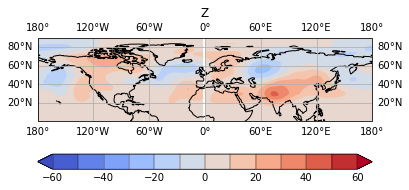

In [32]:
levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som1_cube, cmap='coolwarm',extend='both',levels=levels)

#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().gridlines(draw_labels=True)

plt.show()

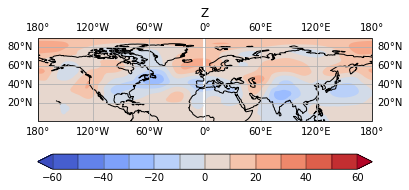

In [33]:
levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som2_cube, cmap='coolwarm',extend='both',levels=levels)
#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().gridlines(draw_labels=True)

plt.show()